In [ ]:
# ========================================================
# Project:  Red Wine Quality Analysis
# Author: Karri Vamsi
# Date: July 27, 2025
# Description: Predict red wine equality using Random Forest and KNN models .
# Dataset: red-wine-quality.csv from Kaggle
# ========================================================

In [17]:
# Step 1: Import Required Libraries for "Wine Quality" project.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000

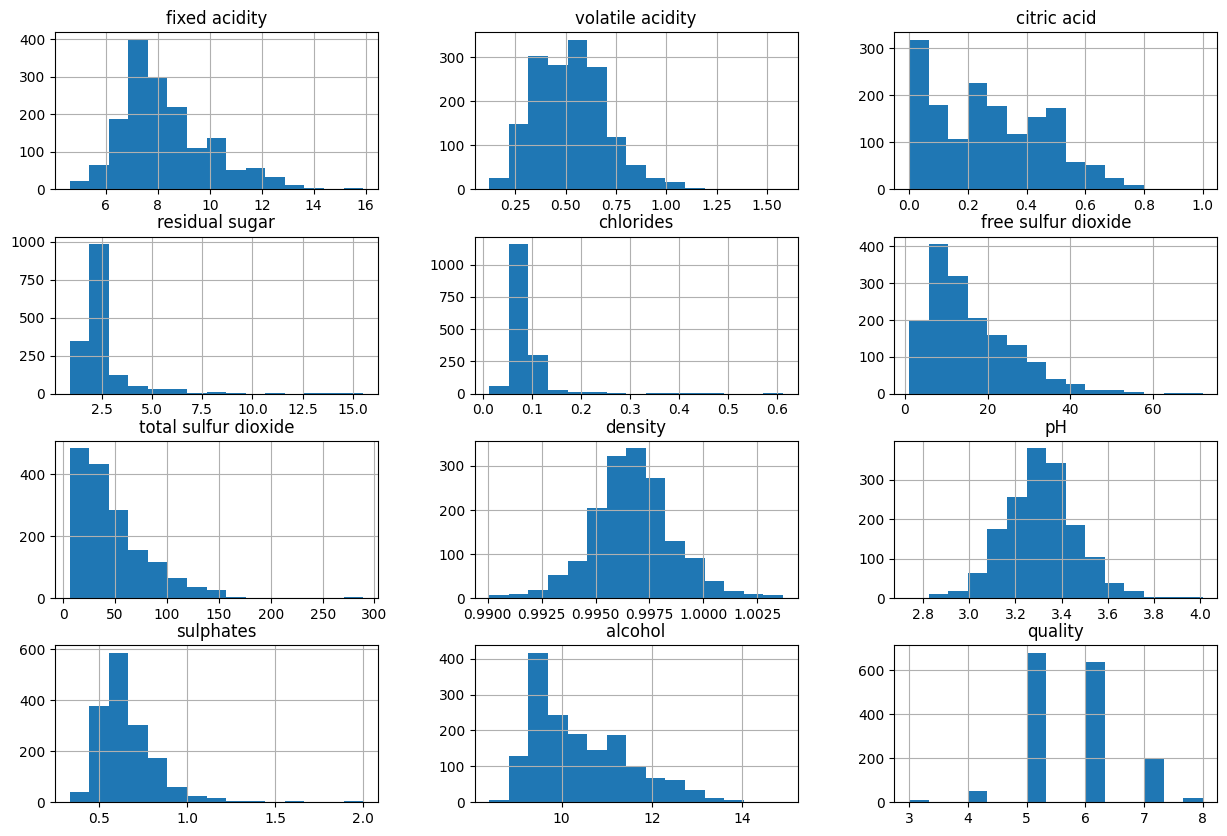

In [18]:
# Step 2: Load and clean data, Perform "EDA" to understand features distribution, Cappings.

data=pd.read_csv(r'winequality-red%202.csv')   # Loading the data
data

print(data.info(),'\n')                         # To check missing values and data type of features
print(data.describe(),'\n')                     # Understand each feature values and its statistics               
print(data['quality'].value_counts(),'\n')      # To check whether the target label is balanced or imbalanced classes.
print(data.corr()['quality'],'\n')              # To check linear features to the target label

data.hist(bins=15,figsize=(15,10))  # Observe the shapes of each feature (Model learns easily from bell shaped data) and cappings.
plt.show()

In [19]:
# Step 3: Split the data into Train and Test set and preprocess the data.


# StratifiedShuffleSplit picks instances uniformly across the target range and splits them, It is best for imbalanced datasets.
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for i,j in sss.split(data,data['quality']):
    x_train = data.loc[i]
    x_test = data.loc[j]


# Decided models to use Random Forest and KNN.
# Data is dividing for KNN and Random forest, Because "Random forest" doesn't require scaled data and "KNN" must require scaled data.

# Data for Random Forest model 
X_train1=x_train.drop(columns=['quality'])                                 # Train Set Features
Y_train=x_train['quality']                                                 # Train Set Label
X_test1=x_test.drop(columns=['quality'])                                   # Test Set Features
Y_test=x_test['quality']                                                   # Test Set Label

# Scale data using MinMaxScaler for KNN model
mms=MinMaxScaler()
mms1=mms.fit_transform(X_train1)
X_train=pd.DataFrame(mms1,columns=X_train1.columns,index=X_train1.index)   # Scaled Train Set Features
mms2=mms.transform(X_test1)
X_test=pd.DataFrame(mms2,columns=X_test1.columns,index=X_test1.index)      # Scaled Test Set Features


F1_weighted of RF val: 0.6533407395958841
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         3
           4      0.000     0.000     0.000        16
           5      0.730     0.824     0.774       204
           6      0.651     0.708     0.678       192
           7      0.692     0.450     0.545        60
           8      0.000     0.000     0.000         5

    accuracy                          0.690       480
   macro avg      0.346     0.330     0.333       480
weighted avg      0.657     0.690     0.669       480



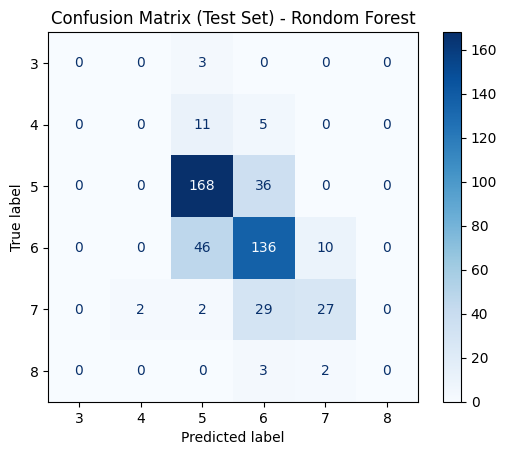

In [20]:
# Step 4: Train and test the Random Forest model without hyper parameter tuning and Performance evalution.

RF=RandomForestClassifier(random_state=25)

CVS_RF=cross_val_score(RF,X_train1,Y_train,cv=5,scoring='f1_weighted')      # Cross_val_score is used when dataset is less, to get validation score.

print("F1_weighted of RF val:",CVS_RF.mean())                               # F1_weighted validation score

MRF=RF.fit(X_train1,Y_train)                                                # Fit the model with Random Forest training set                                         

Y_test_pred_RF=MRF.predict(X_test1)                                         # Evaluate the model using Random Forest testing set


print(classification_report(Y_test,Y_test_pred_RF,digits=3,zero_division=0)) # Overall performance report of the model

# Confusion Matrix (Visual)
cm = confusion_matrix(Y_test,Y_test_pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set) - Rondom Forest")
plt.show()


F1_weighted of KNN val: 0.5505480130963448
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         3
           4      0.667     0.125     0.211        16
           5      0.650     0.721     0.684       204
           6      0.593     0.661     0.626       192
           7      0.486     0.300     0.371        60
           8      0.000     0.000     0.000         5

    accuracy                          0.613       480
   macro avg      0.400     0.301     0.315       480
weighted avg      0.597     0.613     0.594       480



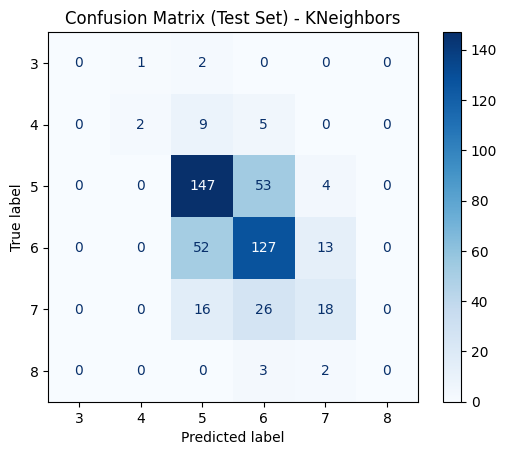

In [21]:
# Step 5: Train and test the KNeighbors model without hyper parameter tuning and Performance evalution.

KNN=KNeighborsClassifier()

CVS_KNN=cross_val_score(KNN,X_train,Y_train,cv=5,scoring='f1_weighted')        # Cross_val_score is used when dataset is less, to get validation score

print("F1_weighted of KNN val:",CVS_KNN.mean())                                # F1_weighted validation score

MKNN=KNN.fit(X_train,Y_train)                                                  # Fit the model with KNN training set  

Y_test_pred_KNN=MKNN.predict(X_test)                                           # Evaluate the model using KNN testing set

print(classification_report(Y_test,Y_test_pred_KNN,digits=3,zero_division=0))  # Overall performance report of the model

# Confusion Matrix (Visual)
cm = confusion_matrix(Y_test,Y_test_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set) - KNeighbors")
plt.show()

F1_weighted of RF1 val: 0.658498260873853
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         3
           4      0.000     0.000     0.000        16
           5      0.731     0.799     0.763       204
           6      0.616     0.719     0.663       192
           7      0.606     0.333     0.430        60
           8      0.000     0.000     0.000         5

    accuracy                          0.669       480
   macro avg      0.326     0.309     0.310       480
weighted avg      0.633     0.669     0.644       480



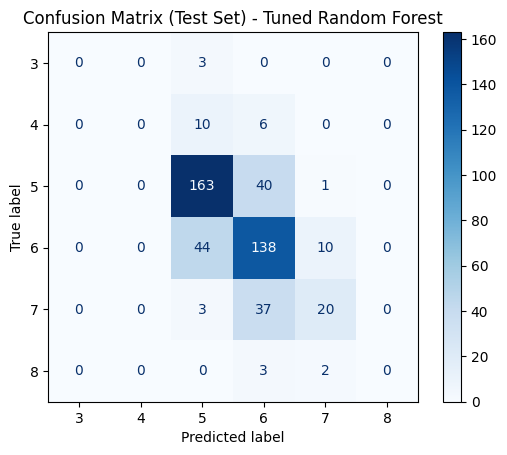

In [22]:
# Step 6: Train and test the Random Forest model with hyper parameter tuning using RandomizedSearchCV and Performance evalution.

# Tune the model to improve performance using RandomizedSearchCV
hyper_params=[
    {'n_estimators':[100,150,200,250,300,350,400,450,500],
     'max_depth':list(range(2,30))
     ,'min_samples_split':list(range(8,12)),
     'min_samples_leaf':list(range(2,7)),'n_jobs':[-1]}]

RSCV_RF1=RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=hyper_params,cv=5,
                            n_iter=60,scoring='f1_weighted',
                            return_train_score=True,random_state=1)

RSCV1_RF1=RSCV_RF1.fit(X_train1,Y_train)                                     # Fit the model with Random Forest training set 

print("F1_weighted of RF1 val:",RSCV_RF1.best_score_)                        # F1_weighted validation score

Y_test_pred_RF1=RSCV1_RF1.predict(X_test1)                                   # Evaluate the model using Random Forest testing set

print(classification_report(Y_test,Y_test_pred_RF1,digits=3,zero_division=0)) # Overall performance report of the model

# Confusion Matrix (Visual)
cm = confusion_matrix(Y_test,Y_test_pred_RF1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RSCV1_RF1.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set) - Tuned Random Forest")
plt.show()

F1 of KNN1 val: 0.6354049613334831
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         3
           4      0.000     0.000     0.000        16
           5      0.727     0.730     0.729       204
           6      0.603     0.703     0.649       192
           7      0.588     0.500     0.541        60
           8      0.000     0.000     0.000         5

    accuracy                          0.654       480
   macro avg      0.320     0.322     0.320       480
weighted avg      0.624     0.654     0.637       480



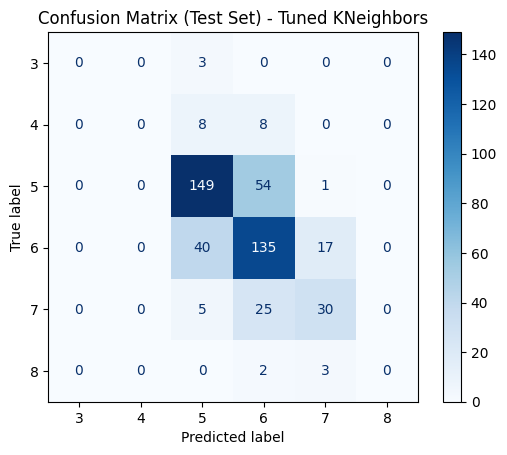

In [23]:
# Step 7: Train and test the KNeighbors model with hyper parameter tuning using RandomizedSearchCV and Performance evalution.

# Tune the model to improve performance using RandomizedSearchCV
hyper_param=[
    {'n_neighbors':list(range(10,40)),'weights':['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan'],'algorithm':['auto']}]

RSCV_KNN1=RandomizedSearchCV(KNeighborsClassifier(),
                             param_distributions=hyper_param,cv=5,
                             n_iter=60,scoring='f1_weighted',
                             return_train_score=True,random_state=1)

RSCV1_KNN1=RSCV_KNN1.fit(X_train,Y_train)                                       # Fit the model with KNN training set 

print("F1 of KNN1 val:",RSCV_KNN1.best_score_)                                  # F1_weighted validation score

Y_test_pred_KNN1=RSCV1_KNN1.predict(X_test)                                     # Evaluate the model using KNN testing set

print(classification_report(Y_test,Y_test_pred_KNN1,digits=3,zero_division=0))  # Overall performance report of the model

# Confusion Matrix (Visual)
cm = confusion_matrix(Y_test,Y_test_pred_KNN1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RSCV1_KNN1.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set) - Tuned KNeighbors")
plt.show()